**importer librairies python**

In [178]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model

lire les fichier csv dans un dataframe 

In [179]:
circuits = pd.read_csv('./dataSet/archive (1)//circuits.csv')
constructorResults = pd.read_csv('./dataSet/archive (1)//constructor_results.csv')
constructorStandings = pd.read_csv('./dataSet/archive (1)//constructor_standings.csv')
constructor = pd.read_csv('./dataSet/archive (1)//constructors.csv')
driverStandings = pd.read_csv('./dataSet/archive (1)//driver_standings.csv')
drivers= pd.read_csv('./dataSet/archive (1)//drivers.csv')
lapTimes = pd.read_csv('./dataSet/archive (1)//lap_times.csv')
pitStops = pd.read_csv('./dataSet/archive (1)//pit_stops.csv')
qualifiying = pd.read_csv('./dataSet/archive (1)//qualifying.csv')
race = pd.read_csv('./dataSet/archive (1)//races.csv')
results = pd.read_csv('./dataSet/archive (1)//results.csv')
seasons = pd.read_csv('./dataSet/archive (1)//seasons.csv')
sprintResults = pd.read_csv('./dataSet/archive (1)//sprint_results.csv')
status= pd.read_csv('./dataSet/archive (1)//status.csv')


**affichage des dataframe**

In [180]:
display(results)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [181]:
"""
dataframe spéciale pour les constructeur 
"""
display(constructor)

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


**UTILISATION Algorithme de régression LASSO**

Le premier algorithme de régression prenant plusieurs paramètres en entrée que je vais étudier est un
algorithme de régression LASSO pour Least Absolute Shrinkage and Selection Operator et qui me permet de
choisir les paramètres les plus importants dans l’ensemble de mes fichiers. En effet, pour prédire le nombre
de points qu’un pilote de Formule 1 peut gagner, cet algorithme permet de sélectionner automatiquement les
variables les plus importantes pour la prédiction. Dans le cas de la Formule 1, il y a souvent beaucoup de
variables qui peuvent influencer les performances d’un pilote, telles que l’âge, l’expérience, la vitesse moyenne,
les positions de départ en pole position, et l’ensemble des points déjà gagner par grand-prix. Le fait d’utiliser
une régression Lasso pour sélectionner les paramètres les plus intéressants pourrait améliorer la précision des
prédictions et éviter le sur-apprentissage.

In [182]:
"""
l'objectif  c'est de prédire le nombre des points d'un pilote peux gagner sur l'ensemble des courses 
    -On prend lewis hamilton comme exemple 
    -creation d'un dataframe spécialiser pour hamilton     
"""

HamiltonResulets = results[results['driverId'] == 1]

HamiltonResulets = HamiltonResulets.replace(['\\N', 'F', 'R', 'W', 'D'], [0, 0, 0, 0, 0])

#suppression des colonne que on utilise pas 
HamiltonResulets = HamiltonResulets.drop('fastestLapTime', axis=1)
HamiltonResulets = HamiltonResulets.drop('time', axis=1)

HamiltonResulets = HamiltonResulets.drop('number', axis=1)
HamiltonResulets = HamiltonResulets.drop('positionText', axis=1)
HamiltonResulets = HamiltonResulets.drop('positionOrder', axis=1)
HamiltonResulets = HamiltonResulets.drop('statusId', axis=1)
HamiltonResulets = HamiltonResulets.drop('resultId', axis=1)

display(HamiltonResulets)
"""
Le dataframe HamiltonResulets Contient la liste des colonne a utiliser pour notre algorithme
['raceId', 'driverId', 'constructorId', 'grid', 'position', 'points','laps', 'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed'] 
"""


,raceId,driverId,constructorId,grid,position,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed
0,18,1,1,1,1,10.0,58,5690616,39,2,218.300
26,19,1,1,9,5,4.0,56,5525103,53,3,209.033
56,20,1,1,3,13,0.0,56,0,25,19,203.969
68,21,1,1,5,3,6.0,66,5903238,20,3,204.323
89,22,1,1,3,2,8.0,58,5213230,31,2,222.085
...,...,...,...,...,...,...,...,...,...,...,...
25982,1106,1,131,3,3,15.0,70,5642946,47,2,208.228
26007,1107,1,131,5,8,4.0,71,5182803,49,10,224.366
26022,1108,1,131,7,3,15.0,52,5123721,43,3,234.221
26043,1109,1,131,1,4,12.0,70,5927768,54,2,193.277


"\nLe dataframe HamiltonResulets Contient la liste des colonne a utiliser pour notre algorithme\n['raceId', 'driverId', 'constructorId', 'grid', 'position', 'points','laps', 'milliseconds', 'fastestLap', 'rank', 'fastestLapSpeed'] \n"

**DEUXIEME ETAPE**

    -creation deux type de donnée :

        a) les données d'entrer : variable X : toutes les colonne sauf la colonne points 
        
        b) la vaiable cible : Y : la colonne points 

In [183]:
X = HamiltonResulets.drop('points', axis=1).values
Y = HamiltonResulets['points'].values

**TROISIEME ETAPE**

Creation les donnée test et les donnée d'entrainement 

    - données d'entrainement :  L'objectif principal des données d'entraînement est de permettre au modèle d'ajuster ses paramètres internes de manière à minimiser l'erreur entre les prédictions du modèle et les valeurs réelles correspondantes dans ces données. Cela permet au modèle de généraliser les schémas qu'il a appris à de nouvelles données non vues auparavant.

    - données de test :  L'objectif principal des données de test est d'estimer la performance du modèle sur des données inconnues. Cela permet de vérifier si le modèle peut généraliser correctement et faire des prédictions précises sur de nouvelles observations.

In [184]:
"""
train_test_split est une fonction fournie par la bibliothèque scikit-learn 
qui permet de diviser un ensemble de données en deux parties distinctes : un ensemble d'entraînement 
et un ensemble de test.
-Les parametre de la fonction : 
    -Données d'entrée (X) et variable cible (Y) : 
        -Cette fonction prend en entrée les données d'entrée (X, dans ce cas, les caractéristiques pour prédire les points de Lewis Hamilton) 
        -la variable cible (Y, les points réels de Lewis hamilton dans ce contexte).
    -Paramètre test_size: 
        -Le paramètre test_size spécifie la proportion de l'ensemble de données à allouer à l'ensemble de test (20% )
- La fonction retourne quatre ensembles de données : 
    - X_train et Y_train sont les données d'entraînement respectivement pour les caractéristiques et la variable cible.
    - X_test et Y_test sont les données de test respectivement pour les caractéristiques et la variable cible.
    
"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)


**QUATRIEME ETAPE**

Initialisation et entrainement  du modèle avec les donnée d'entrainement.

In [185]:
"""
crée un modèle de régression LASSO avec un paramètre d'hyperparamètre alpha réglé sur 1.0. 
LASSO est une méthode de régression linéaire régularisée qui utilise une pénalité L1 
(valeur absolue des coefficients) pour éviter le surajustement et sélectionner les caractéristiques l
es plus importantes.
"""
# Initialisation d'un modèle de régression LASSO avec alpha=1.0
model = linear_model.Lasso(alpha=1.0)

# Entraînement du modèle LASSO avec les données d'entraînement
model.fit(X_train, Y_train)

Lasso()

En combinant ces paramètres, RepeatedKFold(n_splits=10, n_repeats=5, random_state=1) crée un processus de validation croisée où les données sont divisées en 10 plis, et cette division est répétée 5 fois. Chaque itération de cette procédure divise les données de manière aléatoire en 10 plis, et le modèle est entraîné et évalué à chaque fois. Fixer random_state=1 garantit que cette division aléatoire sera toujours la même si le code est exécuté à nouveau, permettant ainsi la reproductibilité des résultats.

**EN RESUME**

cette configuration de validation croisée avec RepeatedKFold permet d'évaluer la performance du modèle de manière robuste en répétant plusieurs fois la division des données en plis pour une estimation plus fiable des performances du modèle.

In [186]:
# Configuration de la validation croisée RepeatedKFold avec 10 plis répétés 
# 5 fois et une seed pour la reproductibilité
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [187]:
# Évaluation du modèle en utilisant la validation croisée (cross-validation)
# cross_val_score exécute la validation croisée en utilisant le modèle, les données d'entraînement,
# et une métrique d'évaluation (scoring='neg_mean_absolute_error' signifie l'erreur absolue moyenne négative)
# cv=cv spécifie l'objet de validation croisée que nous avons configuré précédemment
# n_jobs=-1 indique d'utiliser tous les cœurs de processeur disponibles pour accélérer le processus si possible
scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Conversion des scores de validation croisée en valeurs absolues
scores = np.absolute(scores)

"""
 cette partie du code calcule la moyenne et l'écart type des scores d'erreur absolue moyenne obtenus à partir de la validation croisée,
 fournissant ainsi une mesure de la performance moyenne du modèle et la variabilité de cette performance sur différents plis de la validation croisée. 
 Cela permet d'avoir une idée de la fiabilité des prédictions du modèle.
    * mean(scores) calcule la moyenne des scores d'erreur absolue moyenne. 
        Cela donne une indication de l'erreur moyenne du modèle sur les données de validation croisée.
    *std(scores) calcule l'écart type des scores. 
        L'écart type mesure la dispersion des scores par rapport à la moyenne. 
        Cela indique à quel point les scores sont dispersés autour de la moyenne et donne une idée de la variabilité du modèle.
"""

print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 4.370 (0.583)


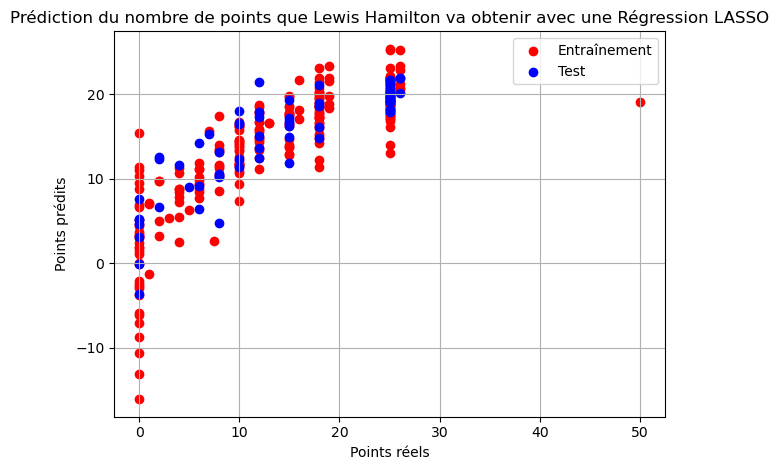

In [193]:
fig, ax = plt.subplots()

# Prédictions sur les données d'entraînement et de test
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Diagramme de dispersion pour les données d'entraînement et de test
plt.scatter(Y_train, predictions_train, color='red', label='Entraînement')
plt.scatter(Y_test, predictions_test, color='blue', label='Test')

ax.set_xlabel("Points réels")
ax.set_ylabel("Points prédits")
plt.title("Prédiction du nombre de points que Lewis Hamilton va obtenir avec une Régression LASSO")
plt.legend()  # Ajout de la légende
plt.grid(True)
plt.tight_layout()

plt.show()



On observe en rouge les résultats obtenus avec le jeu d’entraînement et en bleu les résultats obtenus avec le
jeu de test. Visuellement, les prédictions obtenues en bleu concordent avec les résultats du jeu d’entraînement.
De plus, nous avons un Mean MAE de 4.370 (0.583), le score est faible ce qui indique un taux d’erreur acceptable
mais que l’on peut toujours améliorer avec un algorithme ou en choisissant/remplaçant des données.